In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/UnsupervisedMachineLearningAlgorithm/K_means_2field cluster/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.drop(['CustomerID'],axis =1,inplace =True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#Distribution Plot

In [ ]:
import seaborn as sns

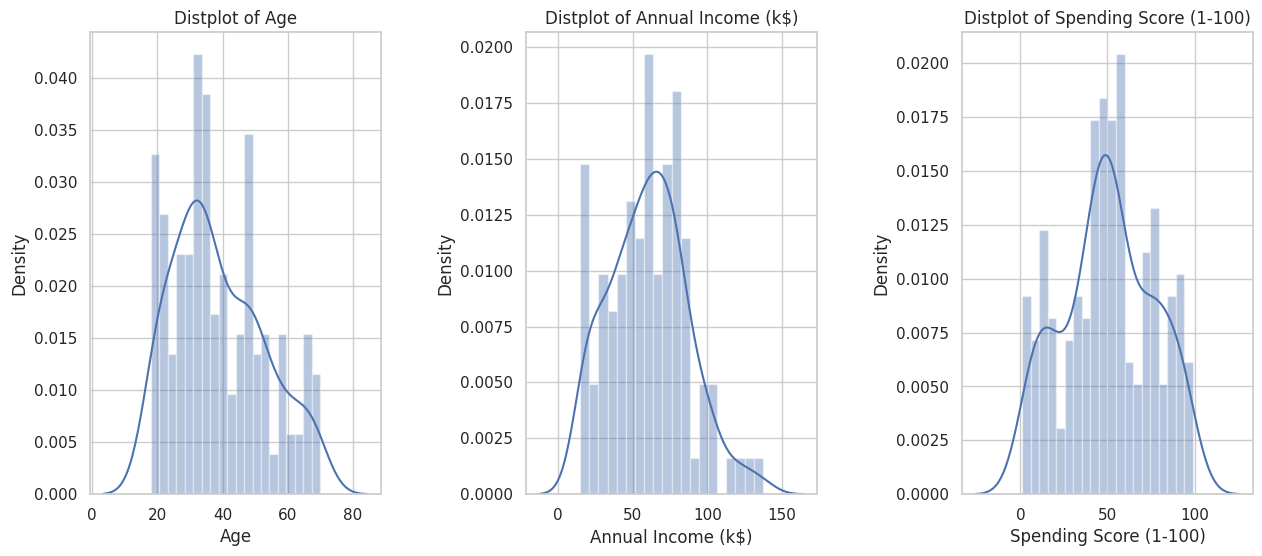

In [ ]:
plt.figure(1,figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3 ,n) # #ofrows,#of col.,index
  plt.subplots_adjust(hspace = 0.5 ,wspace =0.5)
  sns.distplot(df[x],bins = 20)
  plt.title("Distplot of {}".format(x))
plt.show()


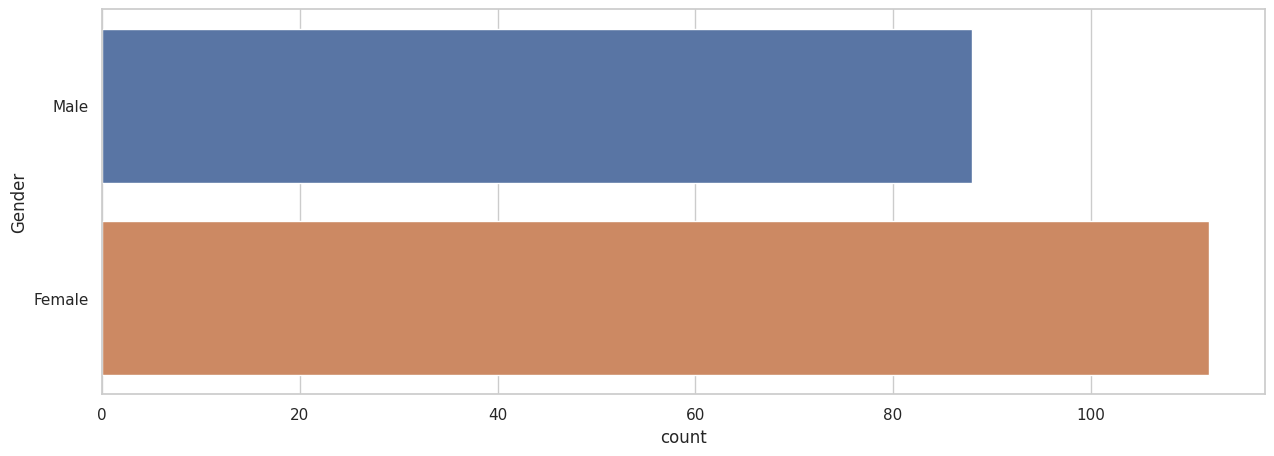

In [ ]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data = df) #comparision b\w male and female
plt.show()

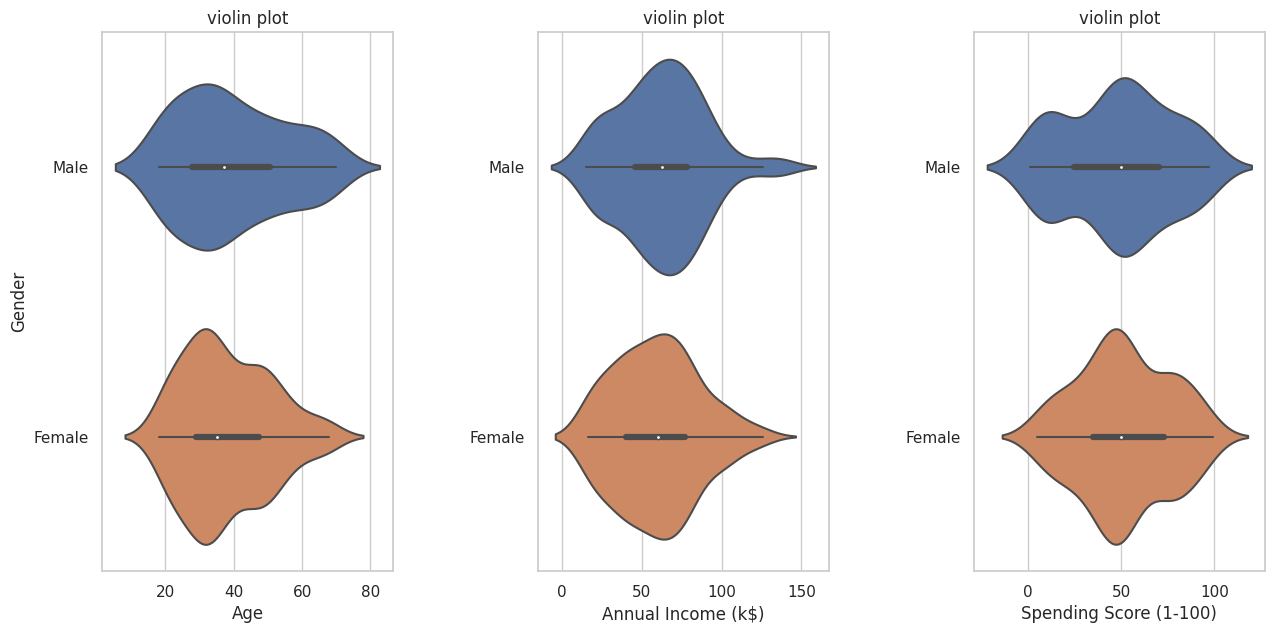

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3 ,n) # #ofrows,#of col.,index
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace = 0.5 ,wspace =0.5)
  sns.violinplot(x = cols, y = "Gender", data = df)
  plt.ylabel("Gender" if n == 1 else '')
  plt.title("violin plot")
plt.show()


#Divide the age into different groups

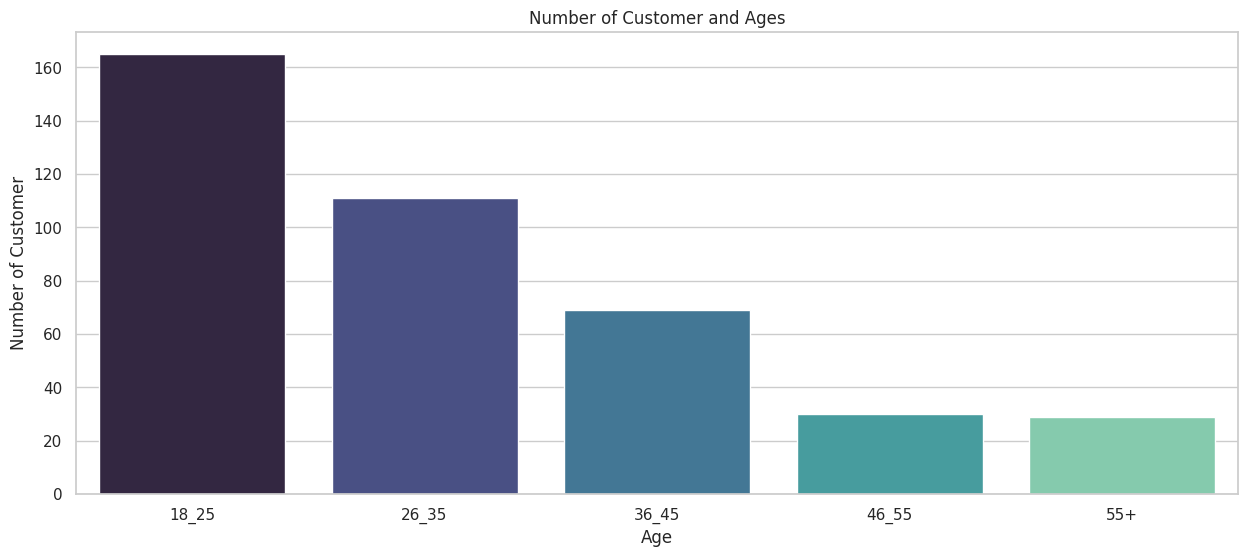

In [ ]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age >= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age >= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age >= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age >= 55)]
age_55above = df.Age[df.Age >= 56]
agex = ['18_25','26_35','36_45','46_55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(1,figsize=(15,6))
sns.barplot(x = agex,y = agey , palette ="mako")
plt.xlabel("Age" )
plt.ylabel("Number of Customer" )
plt.title("Number of Customer and Ages")
plt.show()


#Relationship between the Annual Income and Spending Score 

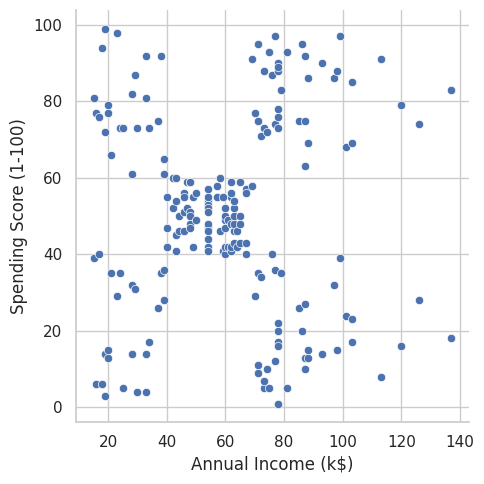

In [ ]:
sns.relplot(x ="Annual Income (k$)", y = "Spending Score (1-100)" ,data = df )

#Divide the spending score into different groups

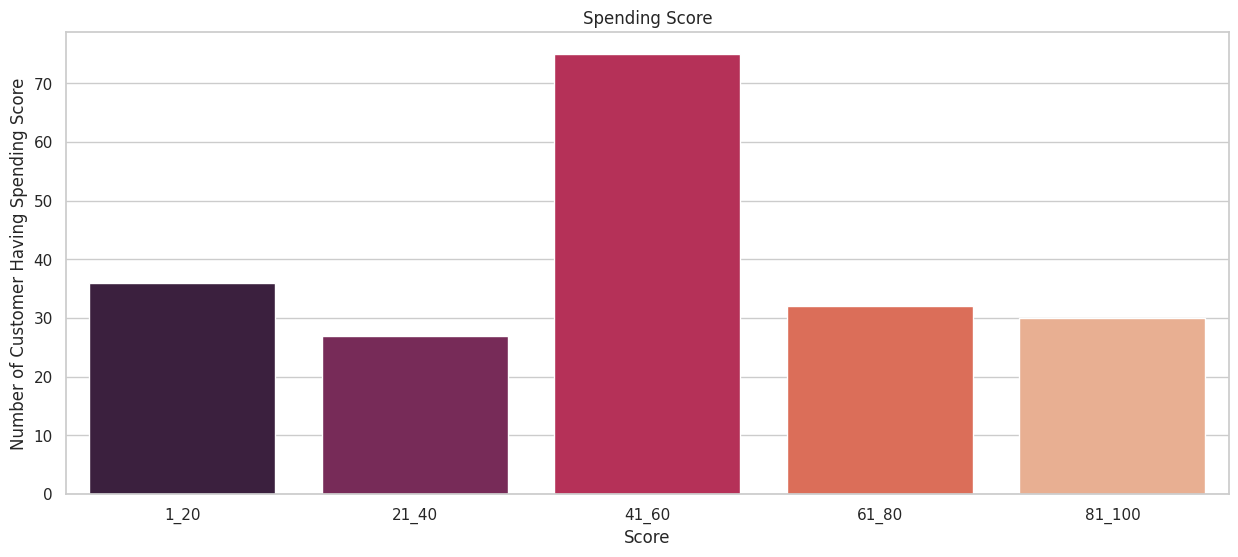

In [ ]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]
agex = ['1_20','21_40','41_60','61_80','81_100']
agey = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(1,figsize=(15,6))
sns.barplot(x = agex,y = agey , palette ="rocket")
plt.xlabel("Score" )
plt.ylabel("Number of Customer Having Spending Score" )
plt.title("Spending Score")
plt.show()


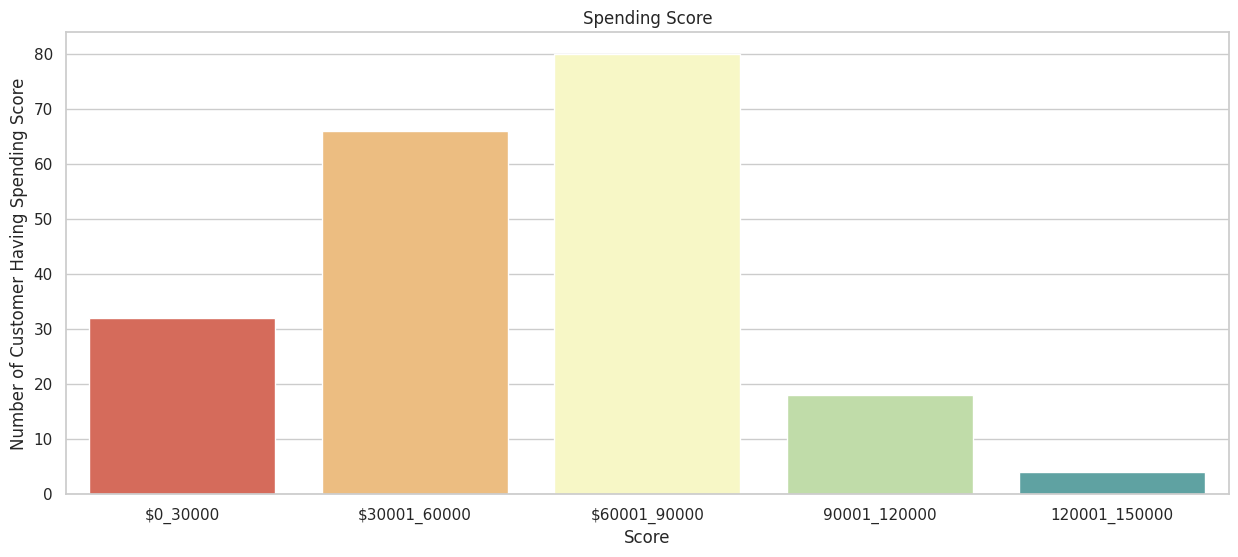

In [ ]:
ai_1_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=1) & (df["Annual Income (k$)"]<=30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]
agex = ['$0_30000','$30001_60000','$60001_90000','90001_120000','120001_150000']
agey = [len(ai_1_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]
plt.figure(1,figsize=(15,6))
sns.barplot(x = agex,y = agey , palette ="Spectral")
plt.xlabel("Score" )
plt.ylabel("Number of Customer Having Spending Score" )
plt.title("Spending Score")
plt.show()


In [ ]:
x1 = df.loc[:,['Age', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans

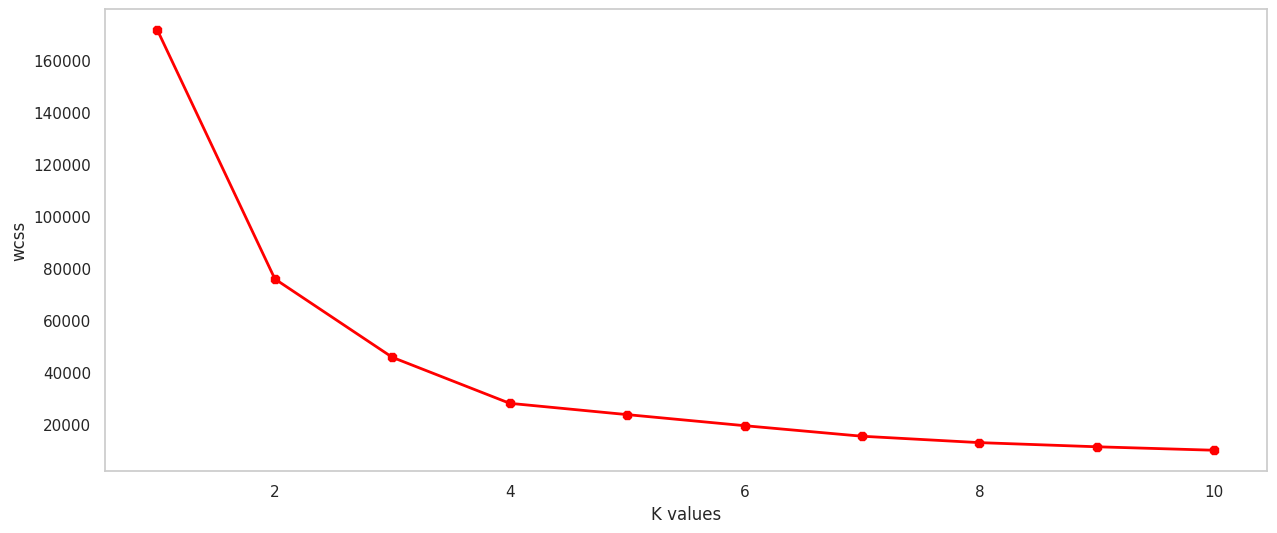

In [ ]:
wcss = []
for i in range(1,11):
   km = KMeans(n_clusters = i, init = 'k-means++') #'k-means++' initialization method.
   km.fit(x1)
   wcss.append(km.inertia_)
plt.figure(1,figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color = "red" , marker ="8")
plt.xlabel("K values" )
plt.ylabel("wcss" )
plt.show()

In [ ]:
km = KMeans(n_clusters = 4) #init = 'k-means++',  random_state = 0)

In [ ]:
labels = km.fit_predict(x1)

In [ ]:
print(labels)

[2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 2 2 3 0 2 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3
 0 3 0 1 0 1 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 2 2 2 2 1 1 1 1 2 2 2 0 2 0 1 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 1 0
 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 0 3 0 3 0 2
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


#Check the centroids

In [ ]:
print(km.cluster_centers_)  

[[30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


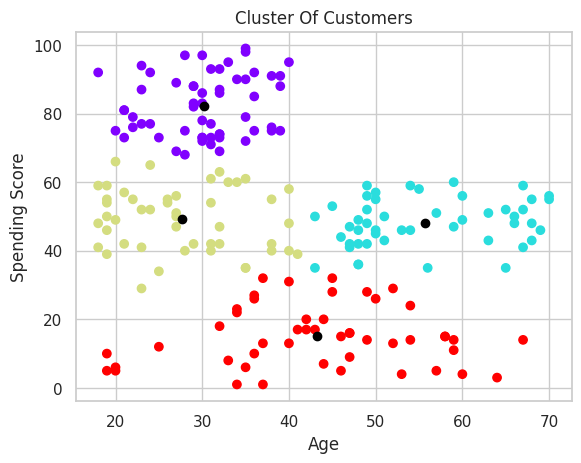

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c = km.labels_,cmap = "rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ="black")
plt.title('Cluster Of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show() 

In [ ]:
x2 = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values

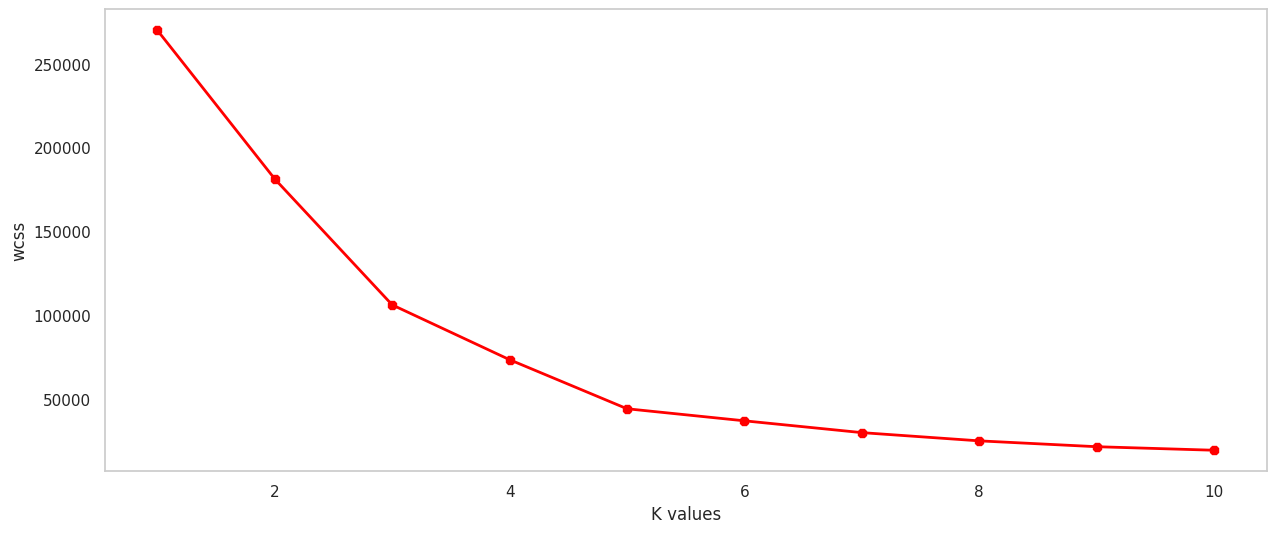

In [ ]:
wcss = []
for i in range(1,11):
   km = KMeans(n_clusters = i, init = 'k-means++') #'k-means++' initialization method.
   km.fit(x2)
   wcss.append(km.inertia_)
plt.figure(1,figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color = "red" , marker ="8")
plt.xlabel("K values" )
plt.ylabel("wcss" )
plt.show()

In [ ]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x2)
print(labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
print(km.cluster_centers_) 

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


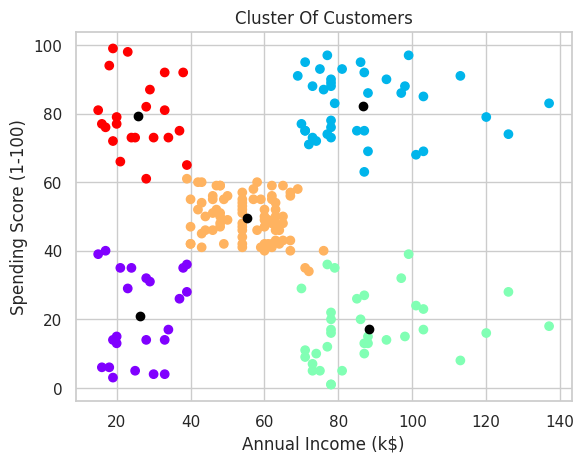

In [ ]:
plt.scatter(x2[:,0], x2[:,1],c=km.labels_,cmap="rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ="black")
plt.title('Cluster Of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show() 

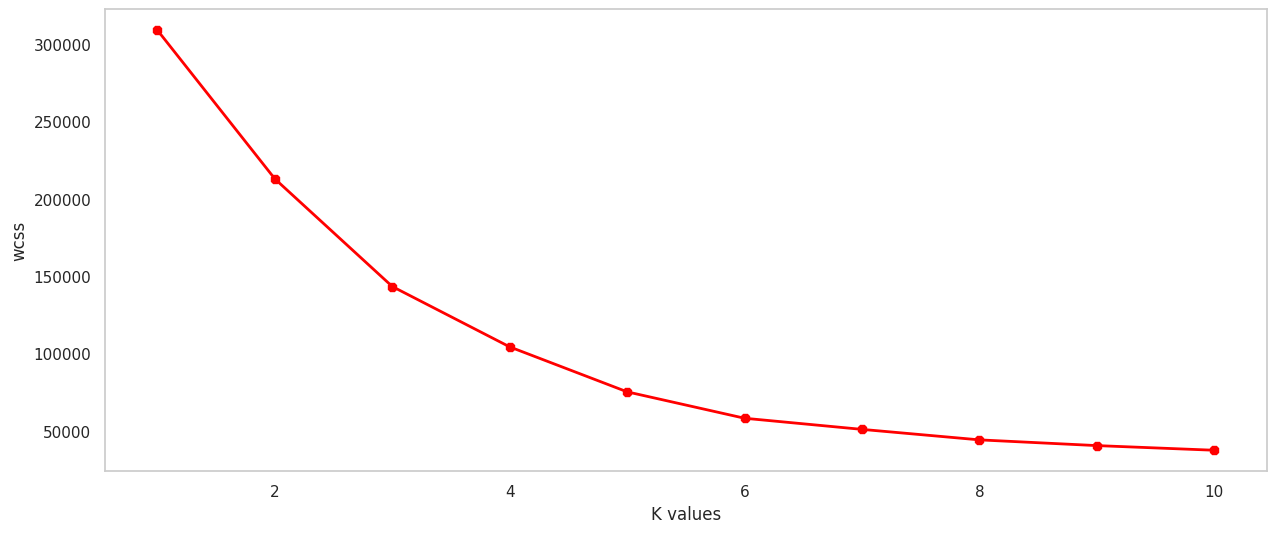

In [ ]:
x3 = df.iloc[:,1:]
wcss = []
for i in range(1,11):
   km = KMeans(n_clusters = i, init = 'k-means++') #'k-means++' initialization method.
   km.fit(x3)
   wcss.append(km.inertia_)
plt.figure(1,figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color = "red" , marker ="8")
plt.xlabel("K values" )
plt.ylabel("wcss" )
plt.show()

In [ ]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x3)
print(labels)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [ ]:
print(km.cluster_centers_) 

[[43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]]


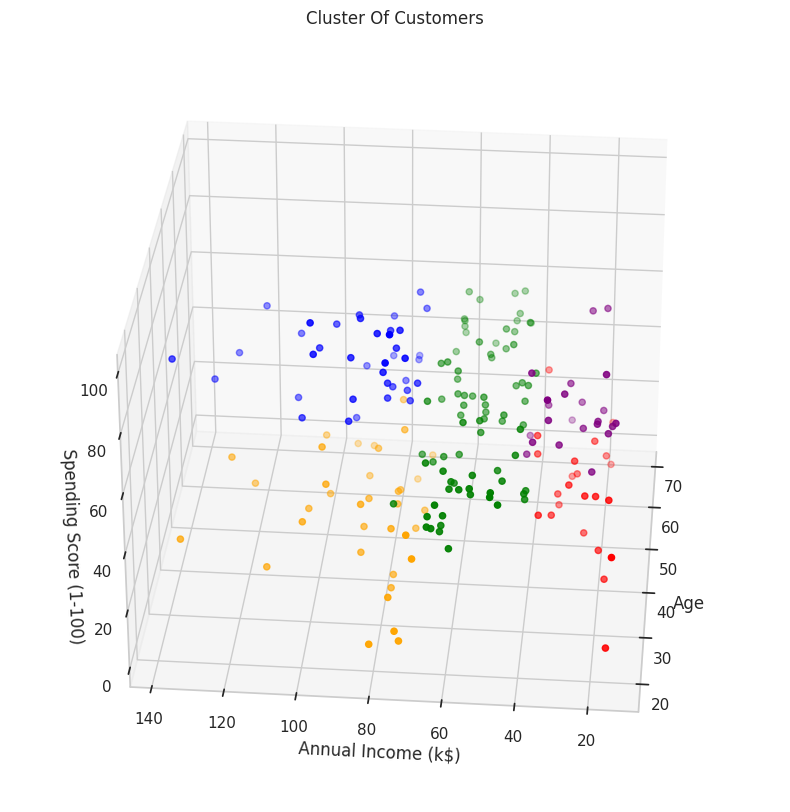

In [186]:
clusters = km.fit_predict(x3)
df["label"] = clusters
fig = plt.figure(1,figsize=(20,10))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(df.Age[df.label == 0],df['Annual Income (k$)'][df.label == 0],df['Spending Score (1-100)'][df.label == 0],c='blue')
ax.scatter(df.Age[df.label == 1],df['Annual Income (k$)'][df.label == 1],df['Spending Score (1-100)'][df.label == 1],c='red')
ax.scatter(df.Age[df.label == 2],df['Annual Income (k$)'][df.label == 2],df['Spending Score (1-100)'][df.label == 2],c='green')
ax.scatter(df.Age[df.label == 3],df['Annual Income (k$)'][df.label == 3],df['Spending Score (1-100)'][df.label == 3],c='orange')
ax.scatter(df.Age[df.label == 4],df['Annual Income (k$)'][df.label == 4],df['Spending Score (1-100)'][df.label == 4],c='purple')
ax.view_init(30,185)
plt.title('Cluster Of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show() 